In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:29<00:00, 43.5MB/s]
100% 1.06G/1.06G [00:29<00:00, 38.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
import matplotlib.pyplot as plt

In [7]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


###Normalization

In [8]:
def normalize(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(normalize)
test_ds=test_ds.map(normalize)

###CNN Model

In [29]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.10))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
save=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 71s 109ms/step - loss: 0.9218 - accuracy: 0.5979 - val_loss: 1.1707 - val_accuracy: 0.6302
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5736 - accuracy: 0.7085 - val_loss: 0.5285 - val_accuracy: 0.7384
Epoch 3/10
625/625 [==============================] - 69s 111ms/step - loss: 0.4825 - accuracy: 0.7718 - val_loss: 0.4884 - val_accuracy: 0.7592
Epoch 4/10
625/625 [==============================] - 67s 105ms/step - loss: 0.4209 - accuracy: 0.8081 - val_loss: 0.6407 - val_accuracy: 0.7292
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3767 - accuracy: 0.8317 - val_loss: 0.5286 - val_accuracy: 0.7544
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3210 - accuracy: 0.8599 - val_loss: 0.5486 - val_accuracy: 0.7714
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2608 - accuracy: 0.8842 - val_loss: 0.5405 - val_ac

###dropout=5%

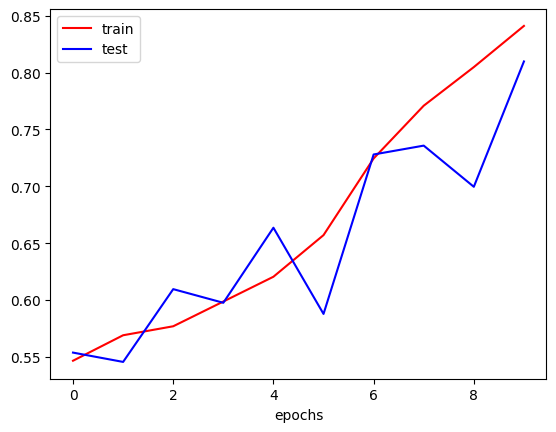

In [21]:
plt.plot(save.history['accuracy'],color='red',label='train')
plt.plot(save.history['val_accuracy'],color='blue',label='test')
plt.xlabel("epochs")
plt.legend()
plt.show()

###dropout=5%+10%

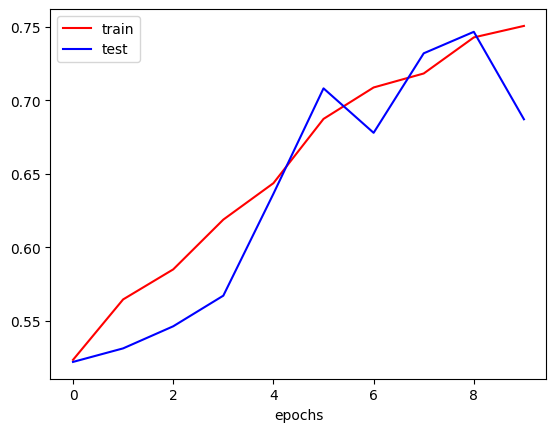

In [28]:
plt.plot(save.history['accuracy'],color='red',label='train')
plt.plot(save.history['val_accuracy'],color='blue',label='test')
plt.xlabel("epochs")
plt.legend()
plt.show()

###no dropout

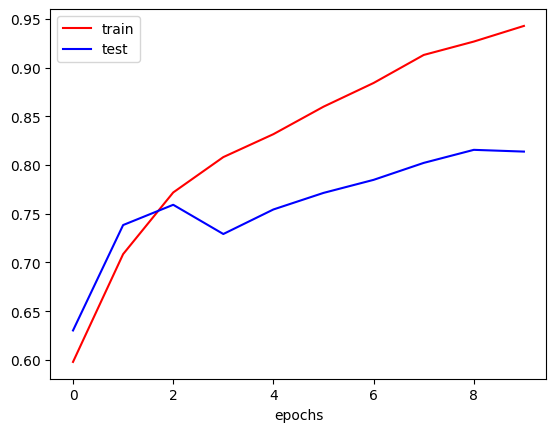

In [32]:
plt.plot(save.history['accuracy'],color='red',label='train')
plt.plot(save.history['val_accuracy'],color='blue',label='test')
plt.xlabel("epochs")
plt.legend()
plt.show()

###To check with own image

In [39]:
!pip install opencv-python

In [40]:
import cv2

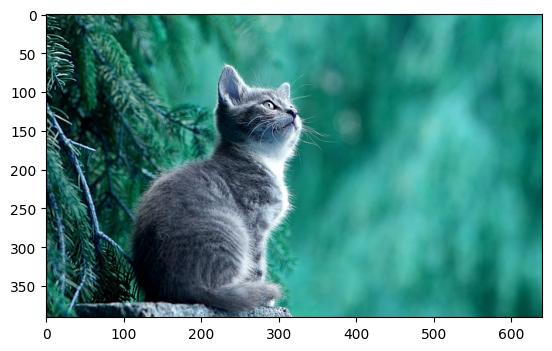

In [43]:
test_img=cv2.imread('/content/cat-2083492_640.jpg')
plt.imshow(test_img)

In [44]:
test_img=cv2.resize(test_img,(256,256))

In [45]:
##convert the data to the shape of (m,nh,nw,3)
test_img=test_img.reshape(1,256,256,3)

In [47]:
if model.predict(test_img)==[[1]]:
  print("cat")
else: print("dog")

1/1 [==============================] - 0s 36ms/step
cat
